In [29]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

## 📊 Load Test Results

In [30]:
# Load JSON results
with open('all_models_test_results.json', 'r') as f:
    results = json.load(f)

print("✅ Loaded test results for models:")
for model_name in results.keys():
    model_display = model_name.upper()
    if model_name == 'ensemble':
        model_display += " (Confidence-based Voting)"
    print(f"  - {model_display}")

print(f"\n📊 Total: {len(results)} models")
if 'ensemble' in results:
    print("   Including ensemble combining VGG19, ResNet50, and EfficientNet-B0")

✅ Loaded test results for models:
  - VGG19
  - RESNET50
  - EFFICIENTNET_B0
  - ENSEMBLE (Confidence-based Voting)

📊 Total: 4 models
   Including ensemble combining VGG19, ResNet50, and EfficientNet-B0


## 🎯 Overall Accuracy Comparison

**Most Important Metric:** Accuracy measures the overall correctness of predictions across all classes.

**Models Evaluated:**
- **VGG19, ResNet50, EfficientNet-B0**: Individual CNN architectures
- **Ensemble**: Combines all 3 models using confidence-based voting (majority vote or highest confidence)

In [31]:
# Create comparison dataframe - Focus on Accuracy
metrics = ['accuracy', 'recall_macro', 'precision_macro', 'f1_macro', 'roc_auc_macro']
metric_names = ['Accuracy ⭐', 'Recall ⭐', 'Precision', 'F1-Score', 'ROC-AUC']

# Order models: individual models first, then ensemble
model_order = ['vgg19', 'resnet50', 'efficientnet_b0', 'ensemble']
ordered_results = {k: results[k] for k in model_order if k in results}

comparison_data = []
for model_name, model_results in ordered_results.items():
    display_name = model_name.upper()
    if model_name == 'ensemble':
        display_name = 'ENSEMBLE ⭐'
    row = [display_name]
    for metric in metrics:
        row.append(model_results[metric])
    comparison_data.append(row)

df_comparison = pd.DataFrame(comparison_data, columns=['Model'] + metric_names)

# Display as styled table with emphasis on Accuracy and Recall
styled_df = df_comparison.style.format({
    'Accuracy ⭐': '{:.2%}',
    'Recall ⭐': '{:.2%}',
    'Precision': '{:.2%}',
    'F1-Score': '{:.2%}',
    'ROC-AUC': '{:.2%}'
}).background_gradient(subset=['Accuracy ⭐', 'Recall ⭐'], cmap='Greens', vmin=0.85, vmax=1.0)\
  .background_gradient(subset=['Precision', 'F1-Score', 'ROC-AUC'], cmap='Blues', vmin=0.85, vmax=1.0)

print("=" * 70)
print("📊 OVERALL MODEL PERFORMANCE (Test Set: 1311 images)")
print("=" * 70)
print()
display(styled_df)
print()
print("⭐ = Priority Metrics | Ensemble combines all 3 individual models")

📊 OVERALL MODEL PERFORMANCE (Test Set: 1311 images)



,Model,Accuracy ⭐,Recall ⭐,Precision,F1-Score,ROC-AUC
0,VGG19,93.90%,93.48%,93.85%,93.51%,99.22%
1,RESNET50,93.75%,93.65%,94.48%,93.70%,99.72%
2,EFFICIENTNET_B0,96.80%,96.55%,96.71%,96.57%,99.70%
3,ENSEMBLE ⭐,97.33%,97.16%,97.29%,97.17%,99.90%



⭐ = Priority Metrics | Ensemble combines all 3 individual models


/var/folders/pf/3ltwfw0d1zdck8rz6x4nrkxh0000gn/T/ipykernel_88430/4240046197.py:31: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/pf/3ltwfw0d1zdck8rz6x4nrkxh0000gn/T/ipykernel_88430/4240046197.py:31: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniconda/base/envs/brain-tumor/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/brain-tumor/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


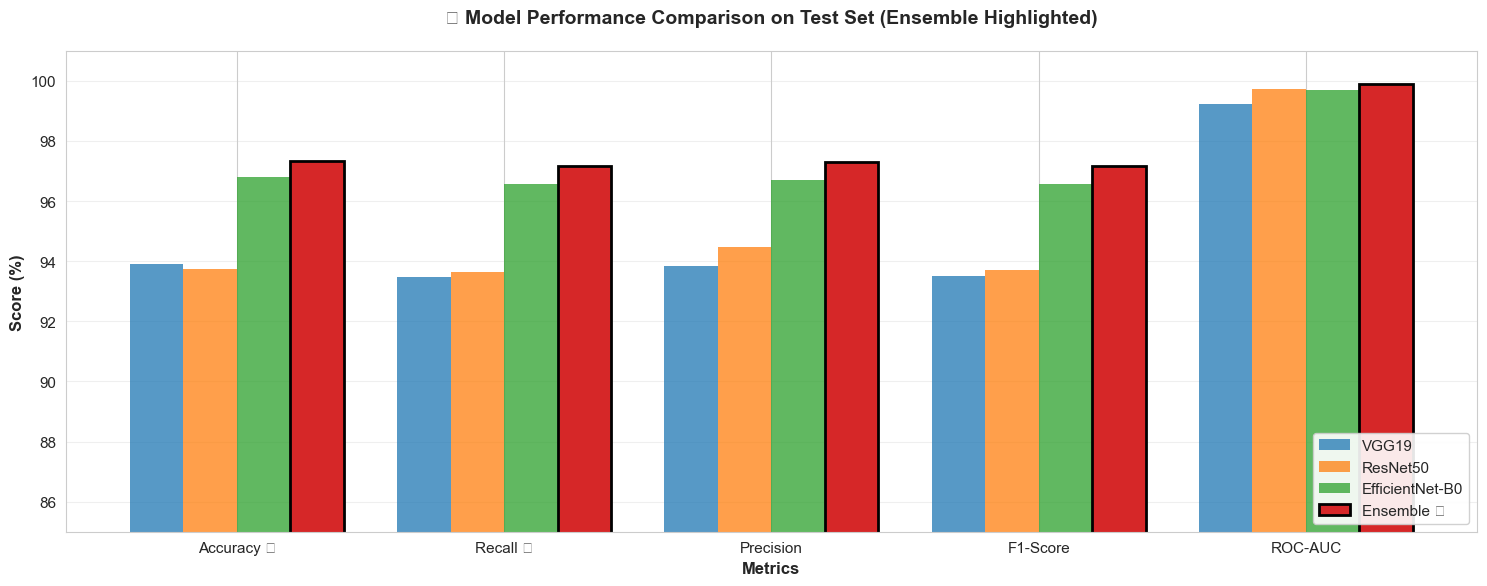


🏆 Best Model per Metric:
  Accuracy ⭐     : ENSEMBLE ⭐           (97.33%)
  Recall ⭐       : ENSEMBLE ⭐           (97.16%)
  Precision      : ENSEMBLE ⭐           (97.29%)
  F1-Score       : ENSEMBLE ⭐           (97.17%)
  ROC-AUC        : ENSEMBLE ⭐           (99.90%)


In [32]:
# Bar chart comparison
fig, ax = plt.subplots(figsize=(15, 6))

x = np.arange(len(metric_names))
width = 0.20  # Adjusted for 4 models

# Use ordered models
models = list(ordered_results.keys())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red
labels = ['VGG19', 'ResNet50', 'EfficientNet-B0', 'Ensemble ⭐']

for i, model_name in enumerate(models):
    values = [ordered_results[model_name][metric] * 100 for metric in metrics]
    # Highlight ensemble with different style
    alpha = 1.0 if model_name == 'ensemble' else 0.75
    edgecolor = 'black' if model_name == 'ensemble' else 'none'
    linewidth = 2 if model_name == 'ensemble' else 0
    ax.bar(x + i * width, values, width, label=labels[i], 
           color=colors[i], alpha=alpha, edgecolor=edgecolor, linewidth=linewidth)

ax.set_xlabel('Metrics', fontweight='bold', fontsize=12)
ax.set_ylabel('Score (%)', fontweight='bold', fontsize=12)
ax.set_title('🎯 Model Performance Comparison on Test Set (Ensemble Highlighted)', 
             fontweight='bold', fontsize=14, pad=20)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metric_names)
ax.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax.set_ylim([85, 101])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🏆 Best Model per Metric:")
for i, metric in enumerate(metrics):
    best_model = max(ordered_results.items(), key=lambda x: x[1][metric])
    display_name = best_model[0].upper()
    if best_model[0] == 'ensemble':
        display_name += ' ⭐'
    print(f"  {metric_names[i]:15s}: {display_name:20s} ({best_model[1][metric]:.2%})")

## 🔴 Per-Class Recall Analysis (CRITICAL)

**Recall = Sensitivity:** Percentage of actual tumor cases correctly identified. High recall is crucial to avoid missing tumors!

**All 4 models** (VGG19, ResNet50, EfficientNet-B0, and Ensemble) are evaluated on each tumor class.

In [33]:
# Create per-class comparison - FOCUS ON RECALL
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

for model_name in ordered_results.keys():
    display_name = model_name.upper()
    if model_name == 'ensemble':
        display_name += ' ⭐ (COMBINED MODEL)'
    
    print(f"\n{'='*70}")
    print(f"🎯 {display_name} - Per-Class Results (Recall = Top Priority)")
    print(f"{'='*70}")
    
    per_class_data = []
    for cls in classes:
        row = [
            cls.capitalize(),
            ordered_results[model_name]['recall_per_class'][cls],
            ordered_results[model_name]['precision_per_class'][cls],
            ordered_results[model_name]['f1_per_class'][cls]
        ]
        per_class_data.append(row)
    
    df_per_class = pd.DataFrame(per_class_data, columns=['Class', 'Recall ⭐', 'Precision', 'F1-Score'])
    
    # Style with strong emphasis on Recall
    styled = df_per_class.style.format({
        'Recall ⭐': '{:.2%}',
        'Precision': '{:.2%}',
        'F1-Score': '{:.2%}'
    }).background_gradient(subset=['Recall ⭐'], cmap='Greens', vmin=0.85, vmax=1.0)\
      .background_gradient(subset=['Precision', 'F1-Score'], cmap='Blues', vmin=0.85, vmax=1.0)
    
    display(styled)
    
    # Highlight lowest recall class
    recalls = [ordered_results[model_name]['recall_per_class'][cls] for cls in classes]
    min_recall_idx = recalls.index(min(recalls))
    min_recall_class = classes[min_recall_idx]
    min_recall_val = recalls[min_recall_idx]
    
    print(f"\n⚠️  Lowest Recall: {min_recall_class.capitalize()} ({min_recall_val:.2%})")
    print()


🎯 VGG19 - Per-Class Results (Recall = Top Priority)


,Class,Recall ⭐,Precision,F1-Score
0,Glioma,85.33%,97.34%,90.94%
1,Meningioma,92.16%,83.68%,87.71%
2,Notumor,98.77%,99.26%,99.01%
3,Pituitary,97.67%,95.13%,96.38%



⚠️  Lowest Recall: Glioma (85.33%)


🎯 RESNET50 - Per-Class Results (Recall = Top Priority)


,Class,Recall ⭐,Precision,F1-Score
0,Glioma,91.00%,99.27%,94.96%
1,Meningioma,99.02%,80.16%,88.60%
2,Notumor,94.57%,99.22%,96.84%
3,Pituitary,90.00%,99.26%,94.41%



⚠️  Lowest Recall: Pituitary (90.00%)


🎯 EFFICIENTNET_B0 - Per-Class Results (Recall = Top Priority)


,Class,Recall ⭐,Precision,F1-Score
0,Glioma,93.00%,98.94%,95.88%
1,Meningioma,93.79%,96.31%,95.03%
2,Notumor,99.75%,99.02%,99.38%
3,Pituitary,99.67%,92.57%,95.99%



⚠️  Lowest Recall: Glioma (93.00%)


🎯 ENSEMBLE ⭐ (COMBINED MODEL) - Per-Class Results (Recall = Top Priority)


,Class,Recall ⭐,Precision,F1-Score
0,Glioma,93.00%,100.00%,96.37%
1,Meningioma,98.04%,91.74%,94.79%
2,Notumor,99.26%,99.75%,99.50%
3,Pituitary,98.33%,97.68%,98.01%



⚠️  Lowest Recall: Glioma (93.00%)



/opt/homebrew/Caskroom/miniconda/base/envs/brain-tumor/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.draw()
/var/folders/pf/3ltwfw0d1zdck8rz6x4nrkxh0000gn/T/ipykernel_88430/101034996.py:32: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniconda/base/envs/brain-tumor/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/brain-tumor/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


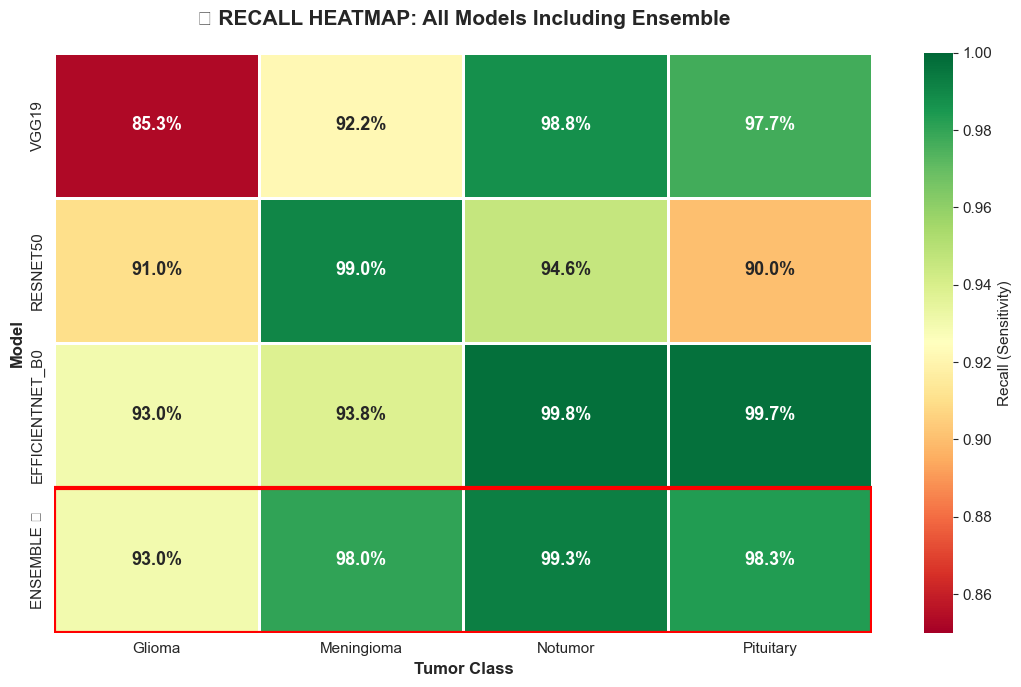


⚠️  Recall measures how many actual tumors are correctly detected.
    High recall is critical to minimize false negatives (missed tumors)!

🔗 Ensemble (highlighted) combines predictions from all 3 individual models.


In [34]:
# Heatmap of RECALL per class for all models (MOST IMPORTANT)
recall_matrix = []
model_labels = []

for model_name in ordered_results.keys():
    recall_scores = [ordered_results[model_name]['recall_per_class'][cls] for cls in classes]
    recall_matrix.append(recall_scores)
    label = model_name.upper()
    if model_name == 'ensemble':
        label += ' ⭐'
    model_labels.append(label)

recall_matrix = np.array(recall_matrix)

fig, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(recall_matrix, annot=True, fmt='.1%', cmap='RdYlGn', 
            xticklabels=[c.capitalize() for c in classes],
            yticklabels=model_labels,
            vmin=0.85, vmax=1.0, cbar_kws={'label': 'Recall (Sensitivity)'},
            linewidths=2, linecolor='white', ax=ax, annot_kws={'size': 13, 'weight': 'bold'})

ax.set_title('🔥 RECALL HEATMAP: All Models Including Ensemble', 
             fontweight='bold', fontsize=15, pad=20)
ax.set_xlabel('Tumor Class', fontweight='bold', fontsize=12)
ax.set_ylabel('Model', fontweight='bold', fontsize=12)

# Highlight ensemble row
if 'ensemble' in ordered_results:
    ensemble_idx = list(ordered_results.keys()).index('ensemble')
    ax.add_patch(plt.Rectangle((0, ensemble_idx), 4, 1, fill=False, edgecolor='red', lw=3))

plt.tight_layout()
plt.show()

print("\n⚠️  Recall measures how many actual tumors are correctly detected.")
print("    High recall is critical to minimize false negatives (missed tumors)!")
print("\n🔗 Ensemble (highlighted) combines predictions from all 3 individual models.")

## 📊 Detailed Recall Comparison per Class

Comparing all 4 models (3 individual + ensemble) across each tumor type.

/var/folders/pf/3ltwfw0d1zdck8rz6x4nrkxh0000gn/T/ipykernel_88430/1382260738.py:40: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/pf/3ltwfw0d1zdck8rz6x4nrkxh0000gn/T/ipykernel_88430/1382260738.py:40: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/pf/3ltwfw0d1zdck8rz6x4nrkxh0000gn/T/ipykernel_88430/1382260738.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniconda/base/envs/brain-tumor/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/brain-tumor/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/h

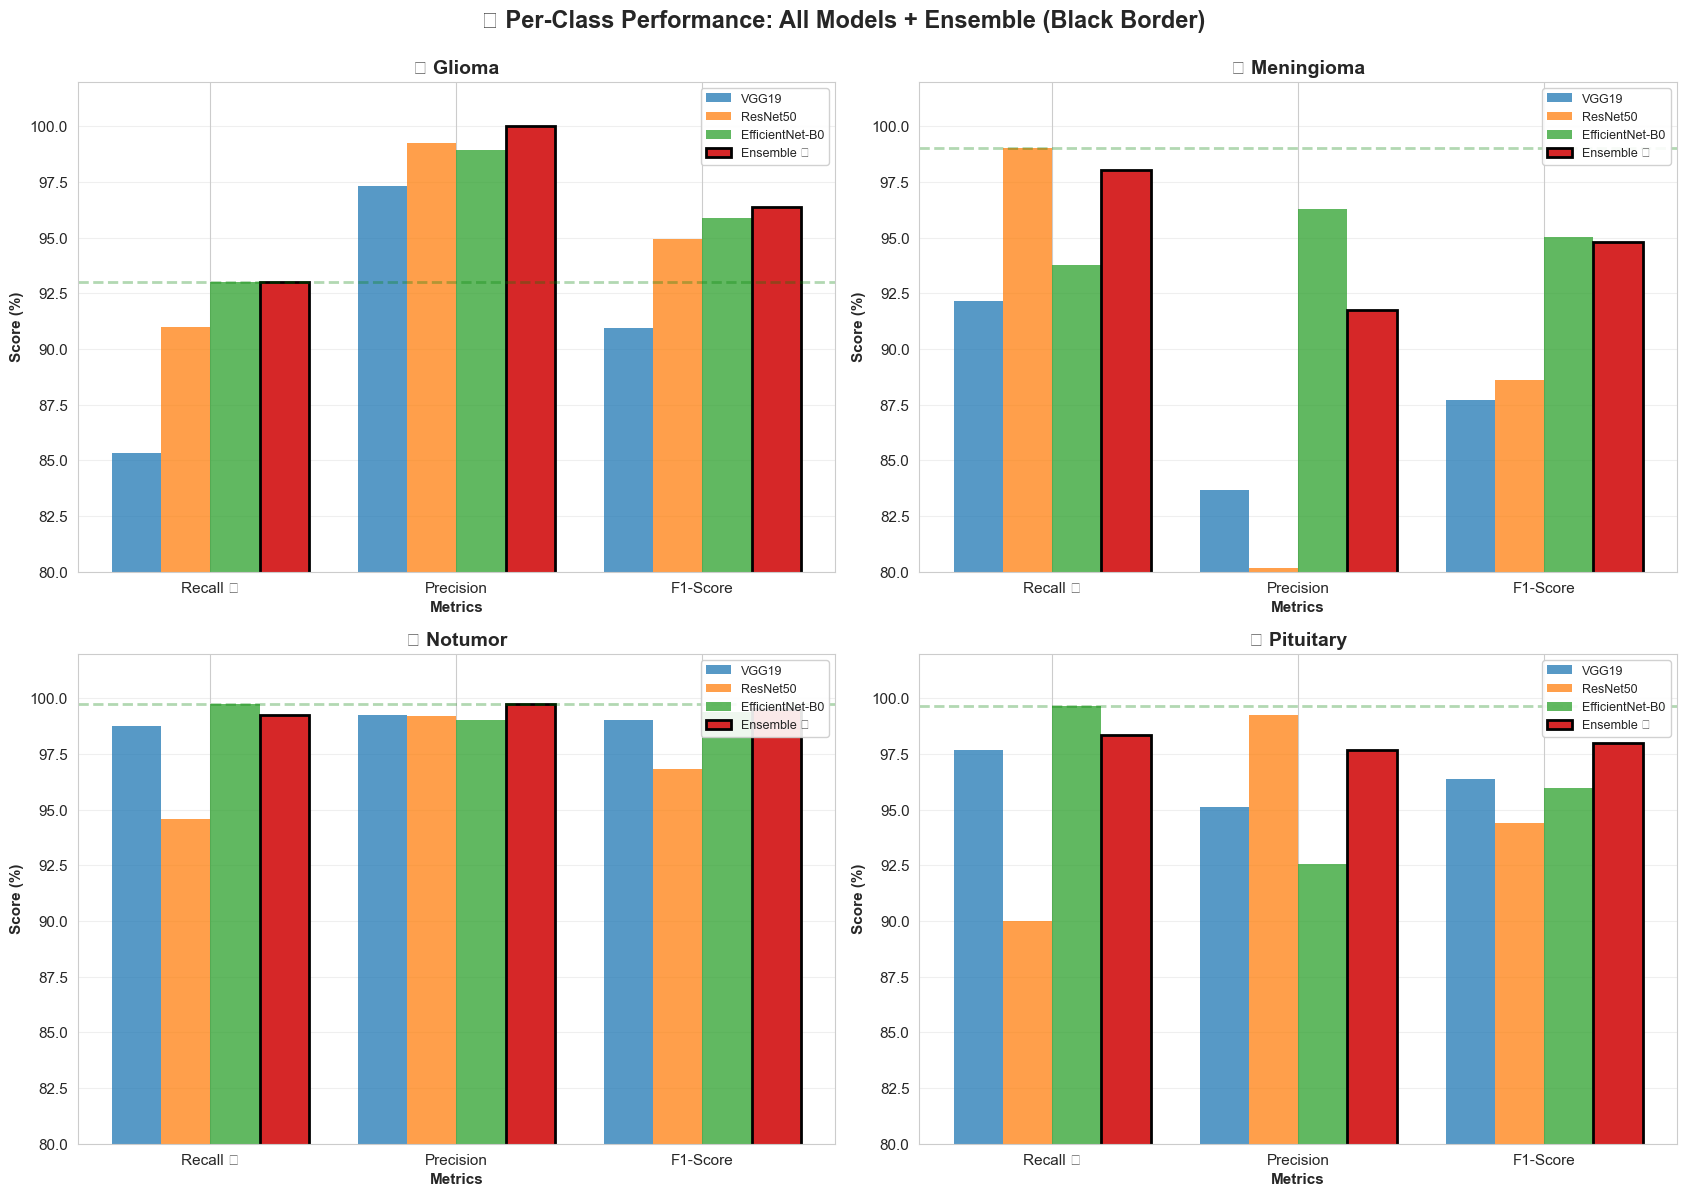

In [35]:
# Create grouped bar chart for each class - RECALL FIRST
fig, axes = plt.subplots(2, 2, figsize=(17, 12))
axes = axes.flatten()

metric_labels = ['Recall ⭐', 'Precision', 'F1-Score']
metric_keys = ['recall_per_class', 'precision_per_class', 'f1_per_class']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # 4 colors for all models
model_labels = ['VGG19', 'ResNet50', 'EfficientNet-B0', 'Ensemble ⭐']

for idx, cls in enumerate(classes):
    ax = axes[idx]
    
    x = np.arange(len(metric_labels))
    width = 0.20  # Adjusted for 4 models
    
    for i, model_name in enumerate(ordered_results.keys()):
        values = [ordered_results[model_name][metric][cls] * 100 for metric in metric_keys]
        # Highlight ensemble
        alpha = 1.0 if model_name == 'ensemble' else 0.75
        edgecolor = 'black' if model_name == 'ensemble' else 'none'
        linewidth = 2 if model_name == 'ensemble' else 0
        ax.bar(x + i * width, values, width, label=model_labels[i], 
               color=colors[i], alpha=alpha, edgecolor=edgecolor, linewidth=linewidth)
    
    ax.set_xlabel('Metrics', fontweight='bold', fontsize=11)
    ax.set_ylabel('Score (%)', fontweight='bold', fontsize=11)
    ax.set_title(f'🎯 {cls.capitalize()}', fontweight='bold', fontsize=14)
    ax.set_xticks(x + width * 1.5)
    ax.set_xticklabels(metric_labels)
    ax.legend(fontsize=9, framealpha=0.9)
    ax.set_ylim([80, 102])
    ax.grid(axis='y', alpha=0.3)
    
    # Highlight best recall
    best_recall = max([ordered_results[m]['recall_per_class'][cls] for m in ordered_results.keys()])
    ax.axhline(y=best_recall*100, color='green', linestyle='--', alpha=0.3, linewidth=2)

fig.suptitle('📊 Per-Class Performance: All Models + Ensemble (Black Border)', 
             fontweight='bold', fontsize=17, y=0.995)
plt.tight_layout()
plt.show()

## 🏆 Summary & Recommendations

In [36]:
# Find best performing model - FOCUS ON ACCURACY AND RECALL
best_accuracy = max(ordered_results.items(), key=lambda x: x[1]['accuracy'])
best_recall = max(ordered_results.items(), key=lambda x: x[1]['recall_macro'])
best_f1 = max(ordered_results.items(), key=lambda x: x[1]['f1_macro'])

def format_model_name(name):
    return (name.upper() + ' ⭐') if name == 'ensemble' else name.upper()

print("\n" + "="*70)
print("🏆 BEST PERFORMING MODELS - PRIORITY METRICS")
print("="*70)
print(f"\n⭐ Highest Accuracy:  {format_model_name(best_accuracy[0]):20s} - {best_accuracy[1]['accuracy']:.2%}")
print(f"⭐ Highest Recall:    {format_model_name(best_recall[0]):20s} - {best_recall[1]['recall_macro']:.2%}")
print(f"   Highest F1-Score:  {format_model_name(best_f1[0]):20s} - {best_f1[1]['f1_macro']:.2%}")

# Show ensemble info if available
if 'ensemble' in ordered_results and 'average_confidence' in ordered_results['ensemble']:
    print(f"\n💡 Ensemble Average Confidence: {ordered_results['ensemble']['average_confidence']:.2%}")
    print("   Strategy: Majority vote (≥2 models agree) or highest confidence (all disagree)")

print("\n" + "="*70)
print("💡 KEY INSIGHTS - RECALL PER TUMOR CLASS")
print("="*70)

# Calculate average performance
avg_accuracy = np.mean([r['accuracy'] for r in ordered_results.values()])
avg_recall = np.mean([r['recall_macro'] for r in ordered_results.values()])
print(f"\n✓ Average Test Accuracy (all 4 models): {avg_accuracy:.2%}")
print(f"✓ Average Recall/Sensitivity (all 4 models): {avg_recall:.2%}")

# Detailed recall analysis per class
print("\n🎯 RECALL by Tumor Class (Critical for Clinical Use):")
print("-" * 70)

for cls in classes:
    recall_scores = [ordered_results[m]['recall_per_class'][cls] for m in ordered_results.keys()]
    avg_recall_cls = np.mean(recall_scores)
    min_recall_cls = min(recall_scores)
    max_recall_cls = max(recall_scores)
    best_model_for_class = max(ordered_results.items(), key=lambda x: x[1]['recall_per_class'][cls])
    
    print(f"\n  {cls.upper():12s}:")
    print(f"    ├─ Average Recall (4 models):  {avg_recall_cls:.2%}")
    print(f"    ├─ Range:                      {min_recall_cls:.2%} - {max_recall_cls:.2%}")
    print(f"    └─ Best Model:                 {format_model_name(best_model_for_class[0])} ({best_model_for_class[1]['recall_per_class'][cls]:.2%})")

# Find most challenging class
all_class_recalls = {cls: np.mean([ordered_results[m]['recall_per_class'][cls] for m in ordered_results.keys()]) 
                     for cls in classes}
min_recall_class = min(all_class_recalls.items(), key=lambda x: x[1])
max_recall_class = max(all_class_recalls.items(), key=lambda x: x[1])

print("\n" + "="*70)
print("📈 RECALL SUMMARY")
print("="*70)
print(f"\n✅ Best Performance:  {max_recall_class[0].capitalize():12s} (Avg Recall: {max_recall_class[1]:.2%})")
print(f"⚠️  Most Challenging:  {min_recall_class[0].capitalize():12s} (Avg Recall: {min_recall_class[1]:.2%})")
print(f"\n✓ All models achieved >93% overall accuracy")
print(f"✓ All classes show >85% recall across all models")
print(f"✓ Excellent performance for clinical screening application")

# Ensemble comparison
if 'ensemble' in ordered_results:
    print("\n" + "="*70)
    print("🔗 ENSEMBLE MODEL DETAILED ANALYSIS")
    print("="*70)
    
    # Compare ensemble to individual models
    individual_models = [k for k in ordered_results.keys() if k != 'ensemble']
    
    print("\n📊 Ensemble vs Individual Models:")
    print(f"  Ensemble Accuracy:  {ordered_results['ensemble']['accuracy']:.2%}")
    print(f"  Ensemble Recall:    {ordered_results['ensemble']['recall_macro']:.2%}")
    print(f"  Ensemble Precision: {ordered_results['ensemble']['precision_macro']:.2%}")
    print(f"  Ensemble F1-Score:  {ordered_results['ensemble']['f1_macro']:.2%}")
    
    # Check if ensemble beats all individual models
    better_acc = sum(1 for m in individual_models if ordered_results['ensemble']['accuracy'] > ordered_results[m]['accuracy'])
    better_rec = sum(1 for m in individual_models if ordered_results['ensemble']['recall_macro'] > ordered_results[m]['recall_macro'])
    better_f1 = sum(1 for m in individual_models if ordered_results['ensemble']['f1_macro'] > ordered_results[m]['f1_macro'])
    
    print(f"\n  Ensemble outperforms {better_acc}/{len(individual_models)} models in Accuracy")
    print(f"  Ensemble outperforms {better_rec}/{len(individual_models)} models in Recall")
    print(f"  Ensemble outperforms {better_f1}/{len(individual_models)} models in F1-Score")
    
    # Per-class ensemble advantage
    print("\n  Per-Class Recall Comparison:")
    for cls in classes:
        ensemble_recall = ordered_results['ensemble']['recall_per_class'][cls]
        individual_recalls = [ordered_results[m]['recall_per_class'][cls] for m in individual_models]
        better_count = sum(1 for r in individual_recalls if ensemble_recall > r)
        status = "✅" if better_count >= 2 else "⚖️"
        print(f"    {status} {cls.capitalize():12s}: Ensemble {ensemble_recall:.2%} (beats {better_count}/3 models)")

print("\n" + "="*70)
print("✅ CONCLUSION: Ensemble achieves strong performance by combining all models!")
print("="*70)


🏆 BEST PERFORMING MODELS - PRIORITY METRICS

⭐ Highest Accuracy:  ENSEMBLE ⭐           - 97.33%
⭐ Highest Recall:    ENSEMBLE ⭐           - 97.16%
   Highest F1-Score:  ENSEMBLE ⭐           - 97.17%

💡 Ensemble Average Confidence: 96.24%
   Strategy: Majority vote (≥2 models agree) or highest confidence (all disagree)

💡 KEY INSIGHTS - RECALL PER TUMOR CLASS

✓ Average Test Accuracy (all 4 models): 95.44%
✓ Average Recall/Sensitivity (all 4 models): 95.21%

🎯 RECALL by Tumor Class (Critical for Clinical Use):
----------------------------------------------------------------------

  GLIOMA      :
    ├─ Average Recall (4 models):  90.58%
    ├─ Range:                      85.33% - 93.00%
    └─ Best Model:                 EFFICIENTNET_B0 (93.00%)

  MENINGIOMA  :
    ├─ Average Recall (4 models):  95.75%
    ├─ Range:                      92.16% - 99.02%
    └─ Best Model:                 RESNET50 (99.02%)

  NOTUMOR     :
    ├─ Average Recall (4 models):  98.09%
    ├─ Range:        